# Unit 2.1.4 - Exploring the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

## Two continuous variables

In [2]:
# Make the scatterplot matrix
# Set the default plot aesthetics to be prettier.
sns.set_style("white")

df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')

In [3]:
# Taking a subset of the data
# Getting data where country is CZ or CH, year is 6, and these columns.
df_czch = df.loc[
    ((df['cntry'] == 'CZ') | (df['cntry'] == 'CH')) & (df['year'] == 6), 
    ['cntry', 'tvtot', 'ppltrst', 'pplfair', 'pplhlp', 'happy', 'sclmeet']
]

In [4]:
df_czch.head()

,cntry,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet
0,CH,3.0,3.0,10.0,5.0,8.0,5.0
1,CH,6.0,5.0,7.0,5.0,9.0,3.0
2,CH,1.0,8.0,8.0,8.0,7.0,6.0
3,CH,4.0,6.0,6.0,7.0,10.0,6.0
4,CH,5.0,6.0,7.0,5.0,8.0,7.0


In [5]:
# Because the variables can only take integer values between 0 and 10, points
# on the scatterplot will hide one another. To better see all the points, we
# create a dataframe of random noise (or "jitter") and add it only when plotting.

# Make a copy of the data to add jitter to and plot.
df_jittered = df_czch.loc[:,'tvtot':'sclmeet'].dropna()

df_jittered.head()

,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet
0,3.0,3.0,10.0,5.0,8.0,5.0
1,6.0,5.0,7.0,5.0,9.0,3.0
2,1.0,8.0,8.0,8.0,7.0,6.0
3,4.0,6.0,6.0,7.0,10.0,6.0
4,5.0,6.0,7.0,5.0,8.0,7.0


With "jitter," a random amount is added or subtracted from the actual number so that when it is plotted on the scatterplot, you can see all the datapoints.

More info [here](https://dataviztalk.blogspot.com/2016/02/how-to-add-jitter-to-plot-using-pythons.html).

In [6]:
# Making the random noise.
# This is the amount that is added or subtracted from the datapoint.
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(df_jittered.shape)),
    columns=df_jittered.columns
)

jitter.head()

,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet
0,0.143966,-0.285232,-0.188551,-0.031406,-0.266020,0.163934
1,0.253105,-0.287184,0.058439,-0.288464,0.196551,-0.292266
2,-0.286804,-0.213942,-0.250774,0.071803,0.196338,0.294306
3,0.134487,0.180651,-0.282854,0.151305,-0.071993,-0.053369
4,0.234181,-0.102919,-0.103306,0.082858,0.121379,-0.001260


In [7]:
# Combine the data and the noise.
df_jittered = df_jittered.add(jitter)

df_jittered.head()

,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet
0,3.143966,2.714768,9.811449,4.968594,7.733980,5.163934
1,6.253105,4.712816,7.058439,4.711536,9.196551,2.707734
2,0.713196,7.786058,7.749226,8.071803,7.196338,6.294306
3,4.134487,6.180651,5.717146,7.151305,9.928007,5.946631
4,5.234181,5.897081,6.896694,5.082858,8.121379,6.998740


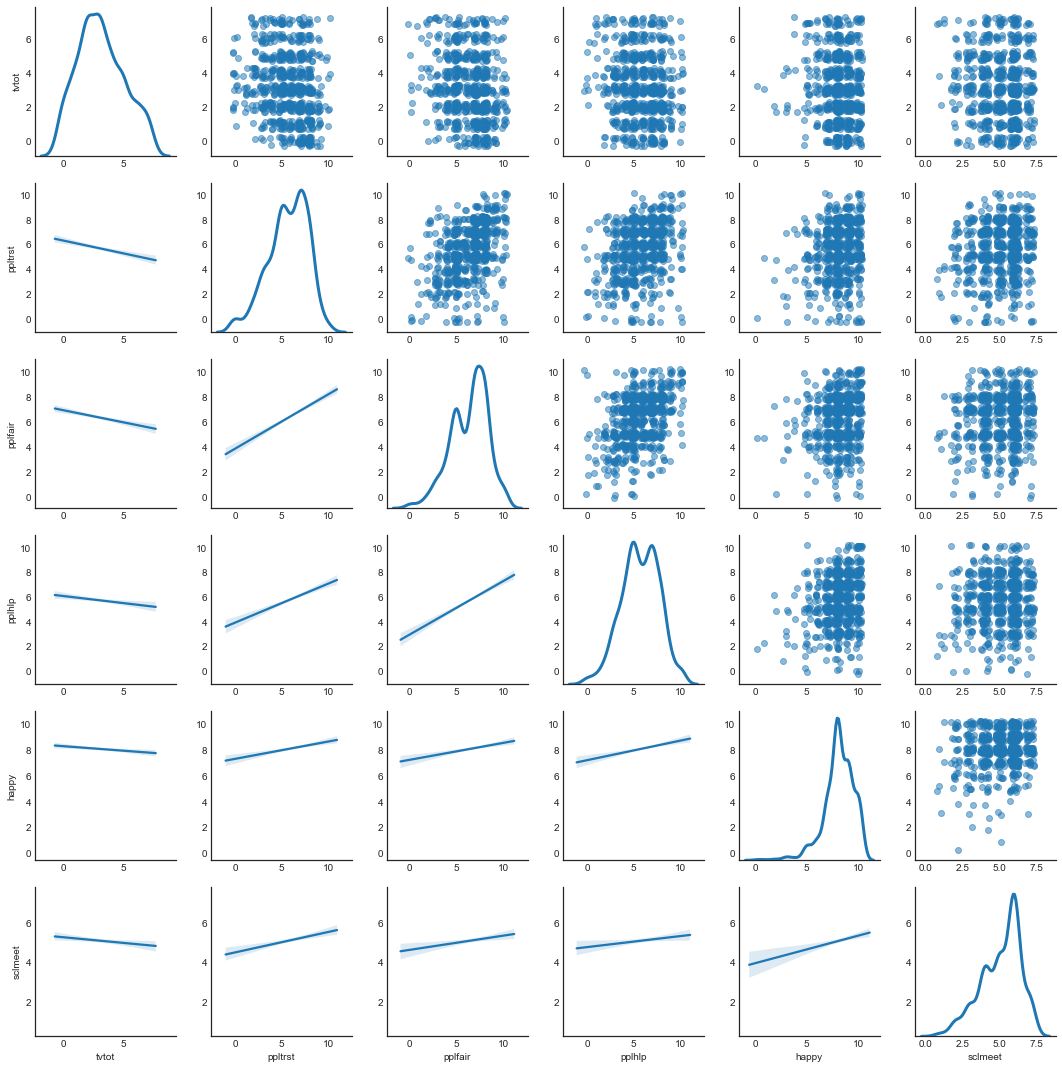

In [8]:
# Now we plot!

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)

# Scatterplots in the upper portion of matrix.
g.map_upper(plt.scatter, alpha=.5)

# Fit line summarizing the linear relationship of the two variables.
# Put it in the lower portion of the matrix
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

# Give information about the univariate distributions of the variables.
# Put it in the diagonal row of the matrix
g.map_diag(sns.kdeplot, lw=3)

# Show the plot
plt.show()

            tvtot   ppltrst   pplfair    pplhlp     happy   sclmeet
tvtot    1.000000 -0.240432 -0.233280 -0.176517 -0.265293 -0.144105
ppltrst -0.240432  1.000000  0.605589  0.500378  0.297432  0.148949
pplfair -0.233280  0.605589  1.000000  0.532927  0.275204  0.105886
pplhlp  -0.176517  0.500378  0.532927  1.000000  0.269627  0.109383
happy   -0.265293  0.297432  0.275204  0.269627  1.000000  0.244289
sclmeet -0.144105  0.148949  0.105886  0.109383  0.244289  1.000000


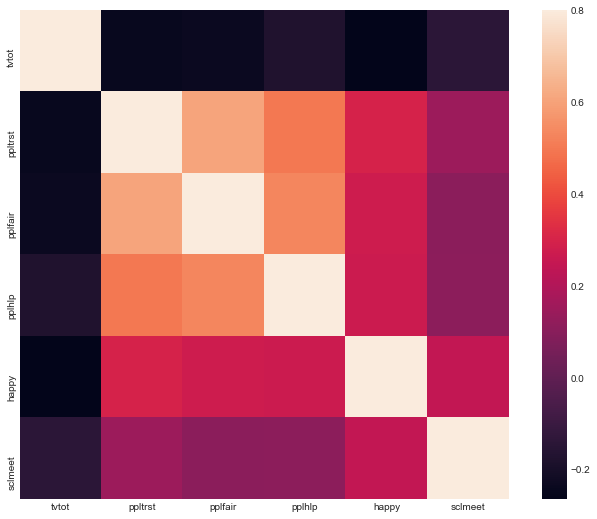

In [9]:
# Make the correlation matrix.
# This maps the r correlations.

corrmat = df_czch.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()
# Heatmaps are a great way to get a quick visual read on a big correlation matrix.

# Try to match the correlation numbers to the scatterplots above to get a 
# sense of what each magnitude of correlation can look like.


## One continuous, one categorical variable

In [10]:
# Boxplots comparing CZ and CH

# Restructure the data so we can use FacetGrid rather than making a boxplot
# for each variable separately.
df_long = df_czch
df_long = pd.melt(df_long, id_vars=['cntry'])

df_long.head()

,cntry,variable,value
0,CH,tvtot,3.0
1,CH,tvtot,6.0
2,CH,tvtot,1.0
3,CH,tvtot,4.0
4,CH,tvtot,5.0


In [11]:
# New 'variable' column that has list of all variables.
df_long.tail()

,cntry,variable,value
8581,CZ,sclmeet,4.0
8582,CZ,sclmeet,5.0
8583,CZ,sclmeet,2.0
8584,CZ,sclmeet,4.0
8585,CZ,sclmeet,5.0


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


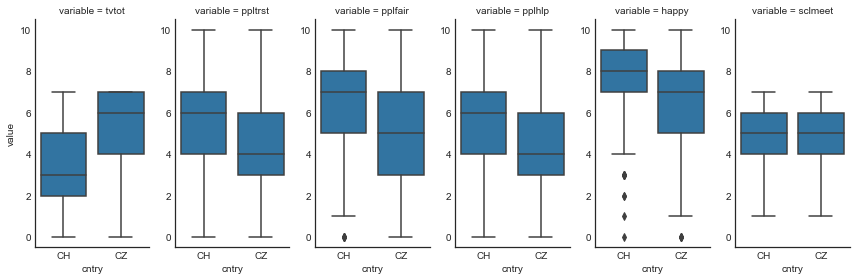

In [12]:
g = sns.FacetGrid(df_long, col="variable", size=4, aspect=.5)
g = g.map(sns.boxplot, "cntry", "value")
plt.show()

In [13]:
# Descriptive statistics by group.
print(df_czch.groupby('cntry').describe())

       happy                                               pplfair            \
       count      mean       std  min  25%  50%  75%   max   count      mean   
cntry                                                                          
CH     770.0  8.088312  1.437920  0.0  7.0  8.0  9.0  10.0   770.0  6.350649   
CZ     646.0  6.770898  2.053582  0.0  5.0  7.0  8.0  10.0   649.0  4.959938   

      ...  sclmeet       tvtot                                               
      ...      75%  max  count      mean       std  min  25%  50%  75%  max  
cntry ...                                                                    
CH    ...      6.0  7.0  772.0  3.141192  1.913706  0.0  2.0  3.0  5.0  7.0  
CZ    ...      6.0  7.0  653.0  5.142420  1.851775  0.0  4.0  6.0  7.0  7.0  

[2 rows x 48 columns]


In [14]:
# Running t-test on group differences to see if they are statistically significant

for col in df_czch.loc[:,'tvtot':'sclmeet'].columns:
    print(col)
    print(stats.ttest_ind(
        df_czch[df_czch['cntry']=='CZ'][col].dropna(),
        df_czch[df_czch['cntry']=='CH'][col].dropna())
         )

tvtot
Ttest_indResult(statistic=19.962218108197227, pvalue=2.3215763985820789e-78)
ppltrst
Ttest_indResult(statistic=-10.928900558029875, pvalue=9.3940290175498276e-27)
pplfair
Ttest_indResult(statistic=-12.444422221030575, pvalue=8.1706858237367176e-34)
pplhlp
Ttest_indResult(statistic=-10.762634615325524, pvalue=5.0297991350713549e-26)
happy
Ttest_indResult(statistic=-14.142750296144351, pvalue=1.4274009995900834e-42)
sclmeet
Ttest_indResult(statistic=-5.4169092111441302, pvalue=7.1108682182128696e-08)


Looking at the boxplots, there are potential outliers for Switzerland's "happy" variable.  The two countries are statistically different in all variables measured... Though maybe not practically significant for all of them.  The sclmeet boxplots look identical.

## Two Categorical Variables


In [15]:
# Creating a dataset with two categorical variables

df_2cat = df.loc[
    ((df['cntry']=='CZ') | (df['cntry']=='CH')) & (df['year'] == 6),
    ['cntry','partner']
]

df_2cat.head()

,cntry,partner
0,CH,1.0
1,CH,1.0
2,CH,2.0
3,CH,1.0
4,CH,1.0


In [16]:
# Create a text variable so that output is easier to interpret.
df_2cat['partner_cat'] = None
df_2cat.loc[df_2cat['partner'] == 1, 'partner_cat'] = 'Lives with partner'
df_2cat.loc[df_2cat['partner'] == 2, 'partner_cat'] = 'Does not live with partner'

df_2cat.head()

,cntry,partner,partner_cat
0,CH,1.0,Lives with partner
1,CH,1.0,Lives with partner
2,CH,2.0,Does not live with partner
3,CH,1.0,Lives with partner
4,CH,1.0,Lives with partner


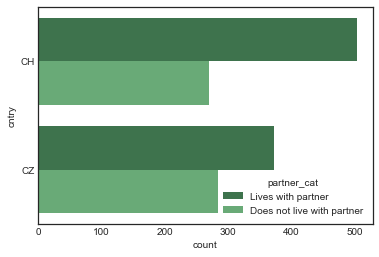

In [17]:
# Plot counts for each combination of levels.
sns.countplot(y="cntry", hue="partner_cat", data=df_2cat, palette="Greens_d")

plt.show()

In [18]:
# Table of counts
counttable = pd.crosstab(df_2cat['cntry'], df_2cat['partner_cat'])
print(counttable)

partner_cat  Does not live with partner  Lives with partner
cntry                                                      
CH                                  270                 503
CZ                                  284                 372


In [19]:
# Test will return a chi-square test statistic and a p-value. Like the t-test,
# the chi-square is compared against a distribution (the chi-square
# distribution) to determine whether the group size differences are large
# enough to reflect differences in the population.
print(stats.chisquare(counttable, axis=None))

Power_divergenceResult(statistic=96.399580125962217, pvalue=9.2365935866454386e-21)


# Unit 2.1.5 - Feature Engineering

#### Turning categorical variables into numerical data
Using 0 or 1 coding.  Useful when model will only run on numerical data. (e.g. linear regressions).

While the ‘cntry’ variable has six levels, only five features are needed to represent all of the information: if we know that the values for ‘CH’,'CZ','DE','ES', and 'NO' are 0, then we also know that the value for ‘SE’ must be 1. The level without a feature is called the reference value.

In [20]:
df.cntry.unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

In [21]:
# Making dummies.
# Also creating a data frame to hold our features.
features = pd.get_dummies(df['cntry'])

features.sample(n=10)

,CH,CZ,DE,ES,NO,SE
8078,0,0,0,0,0,1
2535,0,1,0,0,0,0
6704,0,0,0,0,1,0
7260,0,0,0,0,0,1
4926,0,0,0,1,0,0
1650,0,1,0,0,0,0
7506,0,0,0,0,0,1
3717,0,0,0,1,0,0
5939,0,0,0,0,1,0
3518,0,0,0,1,0,0


We could also make an indicator that gathers together categories we think are related. For instance, we could make a 'Nordic Countries' indicator that tells us if a row has data from Norway or Sweden.

In [22]:
# Nordic countries dummy.
features['Nordic'] = np.where((df['cntry'].isin(['NO', 'SE'])), 1, 0)

print(pd.crosstab(features['Nordic'], df['cntry']))

cntry     CH    CZ  DE    ES    NO    SE
Nordic                                  
0       1546  1316  28  2426     0     0
1          0     0   0     0  1462  1816


#### Numerical data into categorical data

In [23]:
features['Adult_65plus'] = np.where(df['agea']>=65, 1, 0)

features.head()

,CH,CZ,DE,ES,NO,SE,Nordic,Adult_65plus
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0


In [24]:
df['agea'].groupby(features['Adult_65plus']).describe()

,count,mean,std,min,25%,50%,75%,max
Adult_65plus,,,,,,,,
0,6682.0,40.874738,13.958596,15.0,29.0,42.0,53.0,64.0
1,1673.0,73.815302,6.650086,65.0,69.0,72.0,78.0,114.0


## Combining two or more highly-correlated variables

Many models assume that features are correlated with the outcome, but uncorrelated with each other.   Two highly-correlated variables can be averaged to create a feature, or one can be dropped.  Three or more highly-correlated variables can also be combined using a statistical method called **Principal Components Analysis** ("PCA") that reduces the correlated set of variables into a smaller set of uncorrelated features.

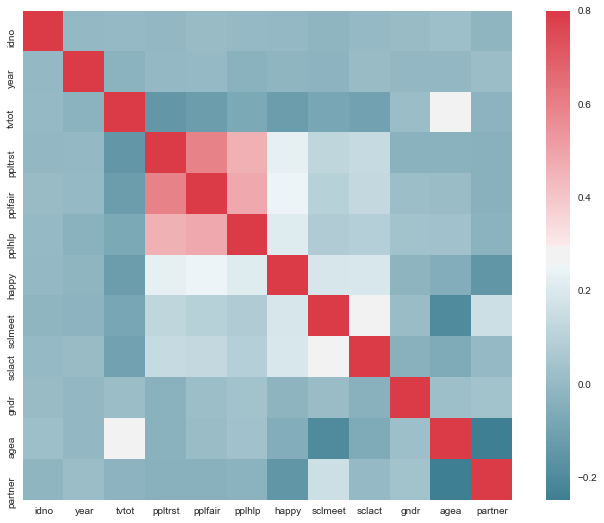

In [25]:
sns.set(style="white")

corrmat = df.corr()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, cmap=cmap, vmax=.8, square=True)

plt.show()

Looks like  ppltrust, pplfair and pplhlp are highly correlated.  Let's make some averages!

Just in case they are on different scales (0 to 10 vs 0 to 7), we need to scale them before averaging.  We do this by subtracting the average of each variable from all values in the variables, then dividing by the standard deviation.

Note: They scales for these variable avtually aren't different. It is 0 - 10.

In [26]:
means = df[['ppltrst','pplfair','pplhlp']].mean(axis=0)
stds = df[['ppltrst','pplfair','pplhlp']].std(axis=0)

In [27]:
print('means')
print(means.head())
print('\n')
print('stds')
print(stds.head())

means
ppltrst    5.559907
pplfair    6.005143
pplhlp     5.319874
dtype: float64


stds
ppltrst    2.233700
pplfair    2.129866
pplhlp     2.173449
dtype: float64


In [28]:
# I DON'T GET THIS
features['trust_fair_help'] = ((df[['ppltrst','pplfair','pplhlp']] - means) / stds).mean(axis=1)

features['trust_fair_help'].head(20)

0     0.194142
1     0.023087
2     1.087377
3     0.322544
4     0.172316
5    -0.134416
6    -1.496166
7    -0.745883
8     1.087377
9    -0.135557
10    0.479048
11    0.329819
12    0.168180
13    0.045911
14   -0.745883
15   -0.439151
16    0.329819
17    0.628278
18    1.080102
19    0.169178
Name: trust_fair_help, dtype: float64

In [29]:
df[['ppltrst','pplfair','pplhlp']].head(20)

,ppltrst,pplfair,pplhlp
0,3.0,10.0,5.0
1,5.0,7.0,5.0
2,8.0,8.0,8.0
3,6.0,6.0,7.0
4,6.0,7.0,5.0
5,6.0,7.0,3.0
6,0.0,5.0,2.0
7,4.0,5.0,3.0
8,8.0,8.0,8.0
9,4.0,4.0,8.0


In [30]:
# I DON'T GET THIS EITHER
# Check how well the composite correlates with each of the individual variables.
plotdf = df.loc[:, ['ppltrst', 'pplfair', 'pplhlp']]
plotdf['trust_fair_help'] = features['trust_fair_help'] 
corrmat2 = plotdf.corr()

print(corrmat2)

                  ppltrst   pplfair    pplhlp  trust_fair_help
ppltrst          1.000000  0.592001  0.462562         0.834209
pplfair          0.592001  1.000000  0.480918         0.841674
pplhlp           0.462562  0.480918  1.000000         0.789318
trust_fair_help  0.834209  0.841674  0.789318         1.000000


## Dealing with non-normality

If normality is a model-assumption (and it often is), then non-normal variables can sometimes be transformed into normally-distributed features using transformations such as taking the square root, the inverse, or the log of the variable. 

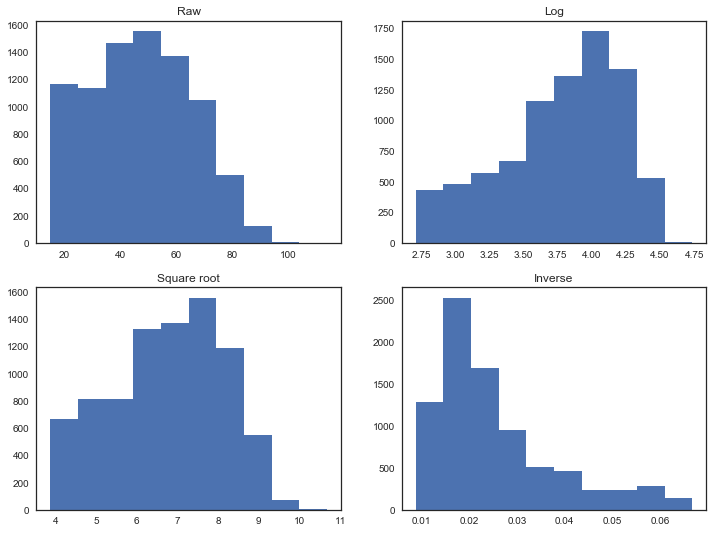

In [31]:
# Making a four-panel plot.
fig = plt.figure(figsize = (12,9))

fig.add_subplot(221)
plt.hist(df['agea'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['agea'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['agea'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df['agea'].dropna())
plt.title('Inverse')
plt.show()

# None of these transformations look particularly great, actually. But let's
# make a feature from the log one.

features['log_age'] = np.log(df['agea'])

## Creating linear relationships

Many models assume that the relationship between a feature and an outcome is linear.  Sometimes, though, you want to include a variable that has a non-linear component to its relationship with the outcome. To capture non-linearity while keeping the model happy, it can be helpful to create quadratic or higher-level features by squaring, cubing, or otherwise multiplying a variable by itself. 

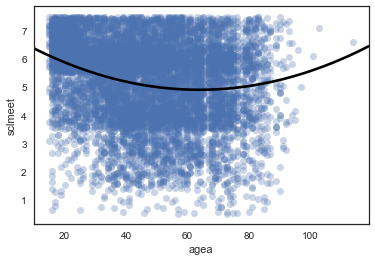

In [32]:
sns.regplot(
    df['agea'],
    y=df['sclmeet'],
    y_jitter=.49,
    
    # Does this mean 'to the order of 2' so we are squaring the data?  Why? Now the line is curved, not linear?
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None,
)
plt.show()

In [33]:
features['age_squared'] = df['agea'] * df['agea']

## Making variables easier to understand in light of the research question
If the research question involves centimeters but a variable is measured in feet, you can create a feature that uses centimeters to make model results easier to interpret in terms of the research question.

You can also re-encode a variable into a feature that matches the terminology of the research question.  A research question about "sadness" will be easier to answer if relevant variables are coded into features where higher values indicate greater, rather than less, sadness.

In [34]:
# Reverse-coding the 'happy' variable so that higher scores mean less
# happiness (and thus possibly more sadness).

# Subtracting the maximum happy score (10) with score to get sadness.
# If Happy score is 10, Sadnesss is 0.  If Happy is 3, Sadness is 7.

features['Sadness'] = max(df['happy']) - df['happy']

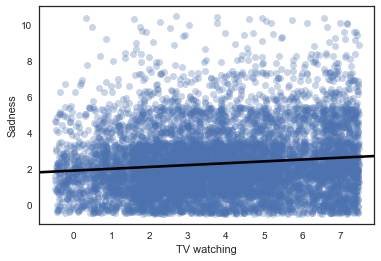

In [35]:
# Plotting Sadness feature against total tv watching.
sns.regplot(
    df['tvtot'],
    features['Sadness'],
    x_jitter=.49,
    y_jitter=.49,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.xlabel('TV watching')
plt.ylabel('Sadness')
plt.show()

## Leveling the playing field

Some modeling methods assume that all features have values in the same range (all features have a min of 0 and max of 1, for example).  Features that vary in range can result in incorrect estimates.  We can normalize all the variables to the same scale (usually a mean of 0 and standard deviation of 1):

In [36]:
from sklearn import preprocessing

In [39]:
# Select only numeric variables to scale.
df_num = df.select_dtypes(include=[np.number]).dropna()

df_num.head()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [41]:
# Save the column names.
names=df_num.columns

In [42]:
# Scale, then turn the resulting numpy array back into a data frame with the
# correct column names.
df_scaled = pd.DataFrame(preprocessing.scale(df_num), columns=names)

df_scaled.head()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,-0.063638,-1.000614,-0.407496,-1.162180,1.884363,-0.148410,0.169415,-0.150071,1.380169,1.007268,0.695456,-0.790680
1,-0.063606,-1.000614,1.085923,-0.259493,0.469267,-0.148410,0.750563,-1.540211,-0.838723,1.007268,0.640859,-0.790680
2,-0.063605,-1.000614,-1.403108,1.094536,0.940966,1.236578,-0.411732,0.544999,0.270723,-0.992784,-1.270063,1.264734
3,-0.063601,-1.000614,0.090310,0.191850,-0.002432,0.774915,1.331710,0.544999,-0.838723,1.007268,0.913848,-0.790680
4,-0.063600,-1.000614,0.588116,0.191850,0.469267,-0.148410,0.169415,1.240069,-0.838723,1.007268,0.422468,-0.790680


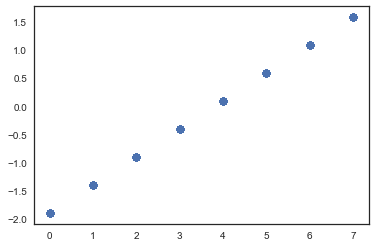

In [43]:
# The new features contain all the information of the old ones, but on a new scale.
plt.scatter(df_num['tvtot'], df_scaled['tvtot'])
plt.show()

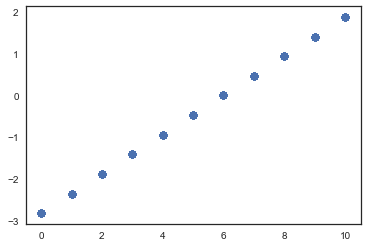

In [44]:
plt.scatter(df_num['pplfair'], df_scaled['pplfair'])
plt.show()

In [45]:
# Lookit all those matching means and standard deviations!
print(df_scaled.describe())

               idno          year         tvtot       ppltrst       pplfair  \
count  8.147000e+03  8.147000e+03  8.147000e+03  8.147000e+03  8.147000e+03   
mean  -6.977221e-18 -5.302688e-16 -5.930638e-17 -8.372665e-17  1.814077e-16   
std    1.000061e+00  1.000061e+00  1.000061e+00  1.000061e+00  1.000061e+00   
min   -6.364414e-02 -1.000614e+00 -1.900914e+00 -2.516209e+00 -2.832624e+00   
25%   -6.196385e-02 -1.000614e+00 -9.053021e-01 -7.108364e-01 -4.741304e-01   
50%   -6.087847e-02  9.993865e-01  9.031023e-02  1.918499e-01 -2.431735e-03   
75%   -5.925039e-02  9.993865e-01  5.881164e-01  6.431931e-01  9.409657e-01   
max    1.734276e+01  9.993865e-01  1.583729e+00  1.997223e+00  1.884363e+00   

             pplhlp         happy       sclmeet        sclact          gndr  \
count  8.147000e+03  8.147000e+03  8.147000e+03  8.147000e+03  8.147000e+03   
mean  -9.768109e-17  2.372255e-16 -1.116355e-16 -2.581572e-16  1.186128e-16   
std    1.000061e+00  1.000061e+00  1.000061e+00  1.

## All about interactions

If you suspect that the relationship between the outcome and a feature depends on the value of a second feature, you may want to create a feature that represents the interaction.

For example, perhaps watching more TV only makes people sad if they do it alone.  People who live with a partner are probably less likely to watch TV alone.  To represent the concept that people who live with a romantic partner don't get sad watching TV but people who don't live with a romantic partner do get sad, we can multiply our 'partner' indicator by the 'sadness' feature to create the interaction.

In [48]:
# Create a better indicator for 'partner.' Currently it is coded 1 for living with 
#       a partner and 2 for not living with a partner.
# If person lives with a partner, it is coded as 1.
features['LivesWithPartner'] = np.where(df['partner']==1, 1, 0)

# Create interaction with multiplication
features['Sad_partner'] = features['Sadness'] * features['LivesWithPartner']

# If the person lives with a partner, Sad_partners is the Sadness score.
# If person does not live with partner, Sadness score is 0.
# BUT WHY

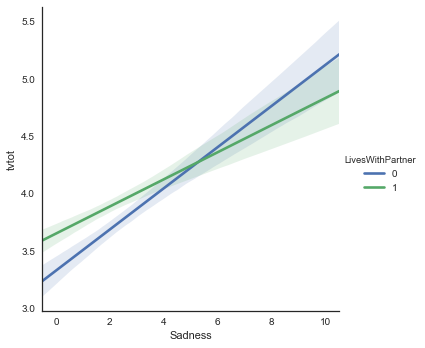

In [50]:
# A plot of an interaction.
# Add the 'tvtot' feature to the features data frame for plotting.
features['tvtot'] = df['tvtot']
sns.lmplot(
    x='Sadness',
    y='tvtot',
    hue='LivesWithPartner',
    data=features,
    scatter=False
)
plt.show()

# Not using 'Sad_partner'... so what was the point of that interaction?